# Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance
In this exercise we implement regularized logistic regression and we use it to study models with different bias-variance properties.

## Load and review the data

In [1]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearRegressionClass import *

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
# Loading all data on a dictonary
data = loadmat('ex5data1.mat')

# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()
Xtest = data['Xtest']
ytest = data['ytest'].flatten()
Xval = data['Xval']
yval = data['yval'].flatten()

# m = number of training examples
# n = number of features
(m,n) = X.shape
# Add a ones column to X
X = np.append(np.ones((m, 1)), X, axis=1)
Xval = np.append(np.ones((Xval.shape[0], 1)), Xval, axis=1)
Xtest = np.append(np.ones((Xtest.shape[0], 1)), Xtest, axis=1)

Text(0, 0.5, 'Water flowing out of the dam (y)')

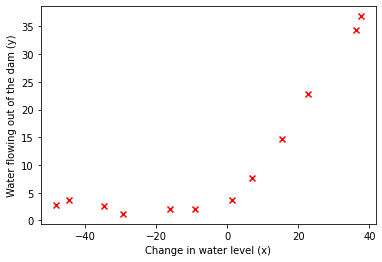

In [3]:
plt.scatter(X[:,1:], y, marker='x', color='red')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

#### Test our Linear Regression Class

In [4]:
lr = linearRegression(50,0)

In [5]:
lmbd = 1
theta = np.array([1,1])
J, grad = lr._CostFunction(theta, X, y, lmbd)
print('Cost at theta = [1, 1]: %.6f \n(this value should be about 303.993192)\n' %J)
print('Gradients at theta = [1, 1] should be about [-15.303016 598.250744]\n', grad)

Cost at theta = [1, 1]: 303.993192 
(this value should be about 303.993192)

Gradients at theta = [1, 1] should be about [-15.303016 598.250744]
 [-15.30301567 598.25074417]


## Train the model

In [6]:
# Train the linear regression model
lr = linearRegression(50,0)
lr.fit(X,y)
# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(lr.cost))
print('Theta found: ', format(lr.theta))
print('This model\'s score is: ', lr.score(X, y))

Cost at theta found by optimize.minimize: 22.374
Theta found:  [13.08790362  0.36777923]
This model's score is:  0.7132909220428962


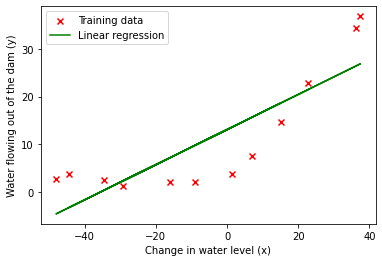

In [7]:
# Using the predict method we plot the bist fit line
plt.scatter(X[:,1:], y, marker='x', color='red')
plt.plot(X[:,1:], lr.predict(X), color='green')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Training data', 'Linear regression'])

## Bias-Variance

Models with high bias are not complex enough for the data provided. They tend to underfit.

Models with high variance overfit to the training data and they don't predict well for data outside the training dataset.


### Learning curves

In [8]:
#This function calculates and plots the learning curve 
def learningCurve(X_train, y_train, X_val, y_val, epochs, lmbd):
    
    # m = number of training examples
    # n = number of features
    (m,n) = X_train.shape
    
    lr = linearRegression(epochs,lmbd)

    for i in range(m):
        lr.fit(X_train[:i+1,:],y_train[:i+1])
        error_train[i], grad = lr._CostFunction(lr.theta, X_train[:i+1,:], y_train[:i+1], 0)
        error_val[i], grad = lr._CostFunction(lr.theta, X_val, y_val, 0)
        
    # plot the learning curves
    plt.xlim(min(range(1, m+1))-1, max(range(1, m+1))+1)
    plt.ylim(0, 150)
    plt.plot(range(1, m+1), error_train, color='blue')
    plt.plot(range(1, m+1), error_val, color='green')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.legend(['Train', 'Cross Validation'])
    plt.title('Polynomial Regression with lambda={:.2f}'.format(lmbd))
    
    return

def plot(X_train, y_train, X_fit, y_fit):
    
    # Using the predict method we plot the bist fit line
    plt.scatter(X_train[:,1:], y_train, marker='x', color='red')
    plt.plot(X_fit, y_fit, color='green')
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.legend(['Training data', 'Linear regression'])
    plt.title('Polynomial Regression with lambda={:.2f}'.format(lmbd))
    
    return

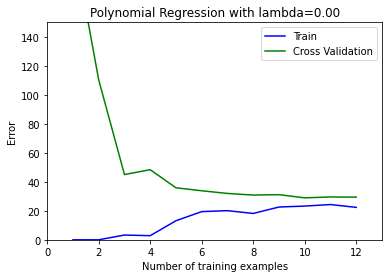

In [9]:
lmbd = 0
epochs = 50
error_train = np.zeros((m, 1))
error_val = np.zeros((m, 1))

learningCurve(X, y, Xval, yval, epochs, lmbd)

We see that both train and cross validation errors are high and don't decrease as the number of training examples increases. <b>This reflects a high bias problem in the model</b>. That is, the linear regression model is too simple and is unable to fit this dataset well.

## Polynomial regression
In this part of the exercise we will address this problem adding more features. We will add more features adding higher powers of the initial model.

We will use scikit-learn <code>PolynomialFeatures</code> transformed class to add a higher term (d).

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [11]:
# It is important to understand the following:
# From https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# mms.fit -> Compute the minimum and maximum to be used for later scaling
# mms.fit_transform ->  Fit to data, then transform it
# mms.transform ->  Scale features of X according to feature_range
# this helps to transform a test dataset or any new data point

# Adding Polynomial degrees and 
# tandardizing the data using min-max scaling from sklearn
trans = PolynomialFeatures(degree=8)
stdsc = StandardScaler()

# We increment polynomial degrees and standardize all three datasets
# We already added the 1s column
X_poly = trans.fit_transform(X[:,1:])
X_poly = stdsc.fit_transform(X_poly[:,1:])
X_poly = np.append(np.ones((X_poly.shape[0], 1)), X_poly, axis=1)

X_poly_val = trans.transform(Xval[:,1:])
X_poly_val = stdsc.transform(X_poly_val[:,1:])
X_poly_val = np.append(np.ones((X_poly_val.shape[0], 1)), X_poly_val, axis=1)

X_poly_test = trans.transform(Xtest[:,1:])
X_poly_test = stdsc.transform(X_poly_test[:,1:])
X_poly_test = np.append(np.ones((X_poly_test.shape[0], 1)), X_poly_test, axis=1)

Using the increased polynomial and normalized dataset we train again the linear regression, obtaining a new set of $\theta$ values

In [12]:
# Train the linear regression model
lmbd = 0
epochs = 200
lr = linearRegression(epochs, lmbd)
lr.fit(X_poly, y)
# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(lr.cost))
print('Theta found: ', format(lr.theta))

Cost at theta found by optimize.minimize: 0.045
Theta found:  [ 11.21569605  10.38383914  20.86218152  17.06758278 -43.06919489
 -42.9075115   41.17926054  35.23332813  -5.12105667]


Now will drawn the resulting model (with increased polynomial degree). In order to do that we first define the range we will draw (X_fit) and we predict the <code>y</code> values.
> Take in consideration that the model has been trained applying Polynomial increase as well as standardization. When standardizing use the same mean and standard variation than for the other datasets
> The sklearn <code>transform</code> use the mean/std values fitted previously

In [13]:
X_fit = np.arange(-100, 100, 5)[:, np.newaxis]
X_poly_fit = trans.transform(X_fit)
X_poly_fit = stdsc.transform(X_poly_fit[:,1:])
X_poly_fit = np.append(np.ones((X_poly_fit.shape[0], 1)), X_poly_fit, axis=1)

Text(0.5, 1.0, 'Polynomial Regression with lambda=0.00')

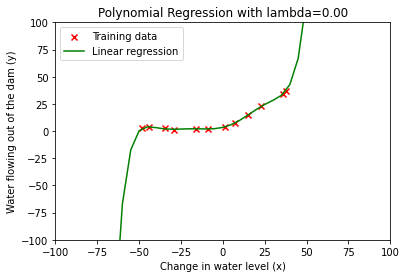

In [14]:
# Using the predict method we plot the bist fit line
plt.scatter(X[:,1:], y, marker='x', color='red')
plt.plot(X_fit, lr.predict(X_poly_fit), color='green')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Training data', 'Linear regression'])
plt.title('Polynomial Regression with lambda={:.2f}'.format(lmbd))

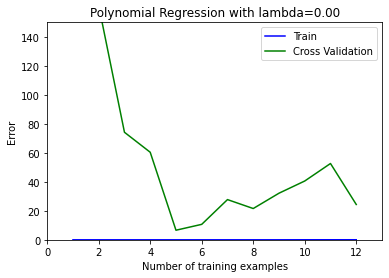

In [15]:
learningCurve(X_poly, y, X_poly_val, yval, epochs, lmbd)

In this case we see that increasing the polynomial degree the resulting function perfectly follows the training datapoints. Therefore the learning curve shows almost no error on the training dataset.
However, when running the model on the cross validation set we find that the error is high.
> This is an indicator that the polynomial regression model is overfitting the training data and will not generalize well.

### Adjusting the regularization parameter
Let's see how the model changes based on the regularization, $\lambda$, values and see the result:

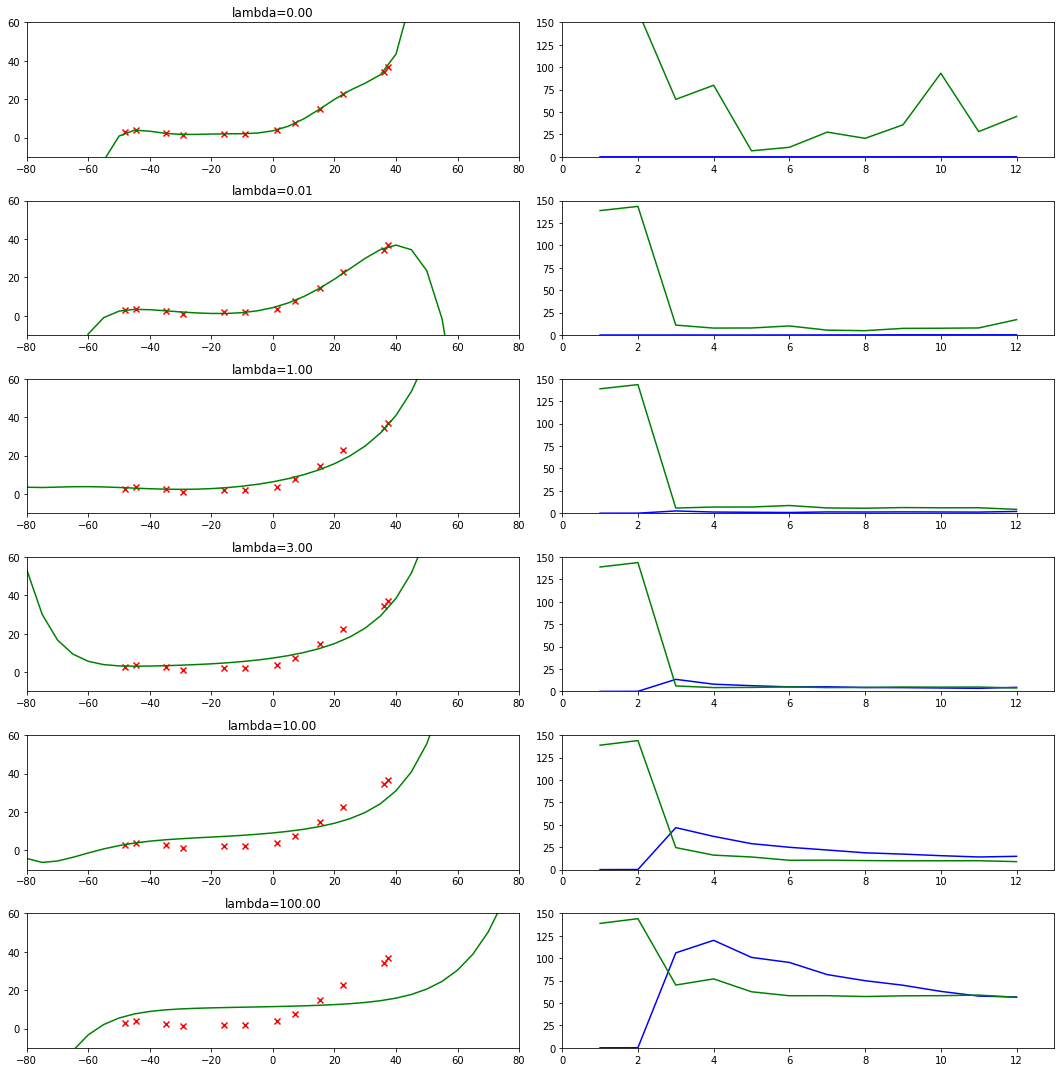

In [16]:
lmbd = [0, 0.01, 1, 3, 10, 100]
fig, ax = plt.subplots(nrows = len(lmbd), ncols = 2, sharex = False, sharey = False, figsize=(15,15))
for i in range(len(lmbd)):
    # Plot the regression model
    lr = linearRegression(epochs, lmbd[i])
    lr.fit(X_poly, y)
    fig.tight_layout()
    ax[i,0].set_title('lambda={:.2f}'.format(lmbd[i]))
    ax[i,0].set_xlim(-80, 80)
    ax[i,0].set_ylim(-10, 60)
    ax[i,0].scatter(X[:,1:], y, marker='x', color='red')
    ax[i,0].plot(X_fit, lr.predict(X_poly_fit), color='green')
    
    # Plot the learning curve
    for j in range(m):
        lr.fit(X_poly[:j+1,:],y[:j+1])
        error_train[j], grad = lr._CostFunction(lr.theta, X_poly[:j+1,:], y[:j+1], 0)
        error_val[j], grad = lr._CostFunction(lr.theta, X_poly_val, yval, 0)
    #ax[i,1].set_title('lambda={:.2f}'.format(lmbd[i]))
    ax[i,1].set_xlim(min(range(1, m+1))-1, max(range(1, m+1))+1)
    ax[i,1].set_ylim(0, 150)
    ax[i,1].plot(range(1, m+1), error_train, color='blue')
    ax[i,1].plot(range(1, m+1), error_val, color='green')
    

### Selecting the optimal $\lambda$ using a cross validation set

Text(0.5, 1.0, 'Selecting lambda using a cross validation set')

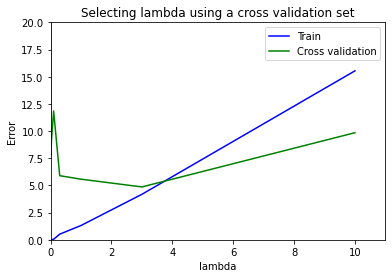

In [17]:
lmbd = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
l_lmbd = len(lmbd)

error_train = np.zeros((l_lmbd, 1))
error_val = np.zeros((l_lmbd, 1))

for i in range(l_lmbd):
    # Plot the regression model
    lr = linearRegression(epochs, lmbd[i])
    lr.fit(X_poly[:i+1,:],y[:i+1])
    error_train[i], grad = lr._CostFunction(lr.theta, X_poly[:i+1,:], y[:i+1], 0)
    error_val[i], grad = lr._CostFunction(lr.theta, X_poly_val, yval, 0)


plt.xlim(min(range(1, l_lmbd+1))-1, max(range(1, l_lmbd+1))+1)
plt.ylim(0, 20)
plt.plot(lmbd, error_train, color='blue')
plt.plot(lmbd, error_val, color='green')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
plt.title('Selecting lambda using a cross validation set')

### Computing the test set error

In [18]:
# Train the linear regression model
lmbd = 3
epochs = 200
lr = linearRegression(epochs, lmbd)
lr.fit(X_poly, y)
# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(lr.cost))
print('Theta found: ', format(lr.theta))

Cost at theta found by optimize.minimize: 14.938
Theta found:  [11.21758934  6.52206749  3.82488096  3.6198631   2.18393139  2.10605227
  1.28075674  1.28787478  0.72492696]


In [19]:
lr._CostFunction(lr.theta, X_poly_test, ytest, 0)

(3.5720624895911555,
 array([-0.99364345, -1.47552954, -0.31431295, -1.39575104, -0.19728876,
        -1.23483637, -0.17266184, -1.00866314, -0.24298363]))